<a href="https://colab.research.google.com/github/harisonmg/data-science-with-python/blob/website/notebooks/insurance_claim_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Data visualization"
author: "Harison Gachuru"
date: 2023-03-08
---

# Insurance Claim Analysis

The task at hand is to identify health and demographic characteristics that lead to poor health, using health insurance claim amounts as an indicator.

Data sources: 
- [Kaggle](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health)
- [data.world](https://data.world/sumitrock/insurance)

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config

In [ ]:
# columns in the data
TARGET_COL = "claim"

# plots
%matplotlib inline
sns.set_theme(context="notebook", style="whitegrid", rc={"figure.figsize": (14, 8)})

# Loading the data
- [More info on reading CSV files with pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
# Google Drive link: https://drive.google.com/file/d/18zxQ8rwoinnWBTcDxhgP7pO_3QUSWcpZ/view?usp=sharing
df = pd.read_csv(
    "https://drive.google.com/uc?id=18zxQ8rwoinnWBTcDxhgP7pO_3QUSWcpZ",
    index_col="index"
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


# YData profiling report
[`ydata-profiling` docs](https://ydata-profiling.ydata.ai/docs/master/index.html)

In [ ]:
import sys
!{sys.executable} -m pip install -q ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Separate features from target
- [More info on selecting pandas dataframe columns by data type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

In [ ]:
y = df[TARGET_COL]
X = df.drop(TARGET_COL, axis=1)

numeric_dtypes = ["int64", "float64"]
categorical_df = X.select_dtypes(exclude=numeric_dtypes)
numeric_df = X.select_dtypes(include=numeric_dtypes)

# Distribution of variables

## Target variable
- [More info on creating histograms with seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html)

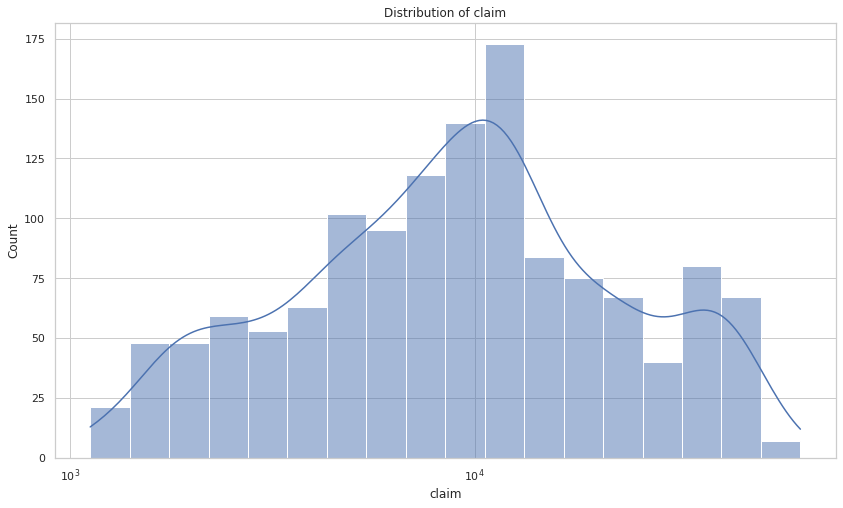

In [ ]:
fig, ax = plt.subplots()

sns.histplot(x=y, ax=ax, log_scale=True, kde=True)
ax.set_title(f"Distribution of {TARGET_COL}")
plt.show()

## Numeric features
- [More info on creating subplots with matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

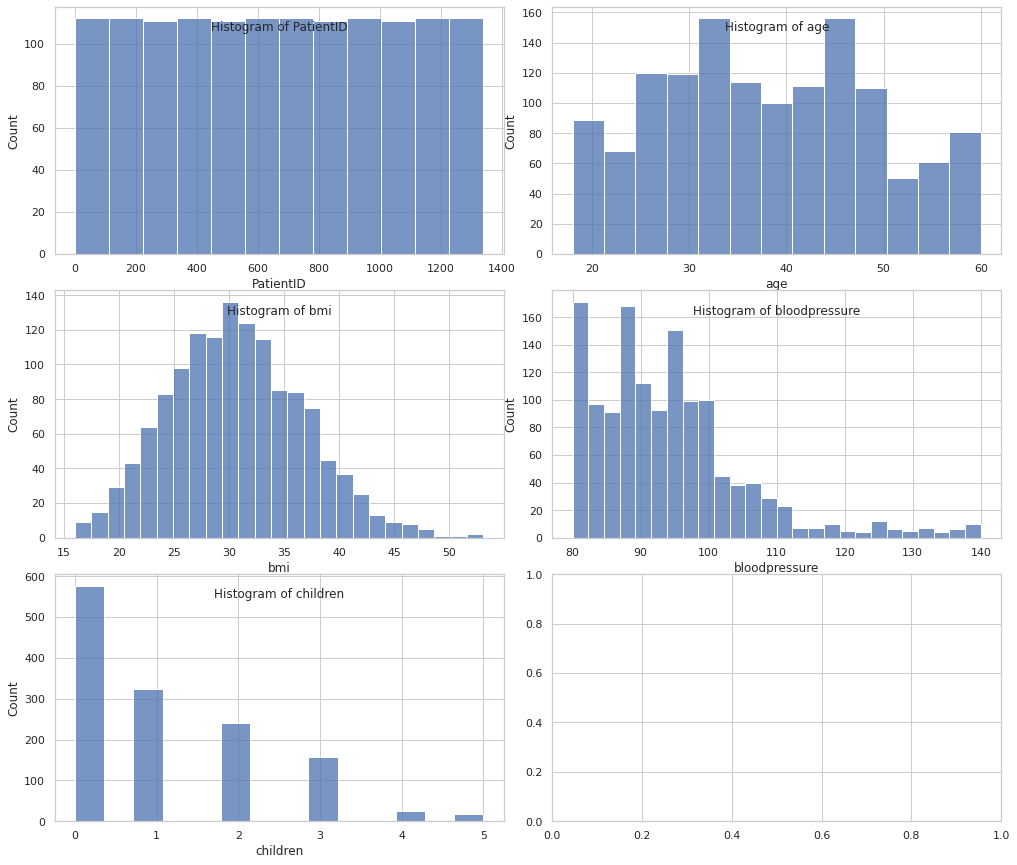

In [ ]:
cols = 2
rows = np.ceil(numeric_df.shape[1] / cols).astype(int)
fig, axes = plt.subplots(rows, 2, figsize=(14, 8 // cols * rows))
plt.tight_layout()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i // cols, i % cols]
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f"Histogram of {col}", y=0.88)

plt.show()

## Numeric features by target

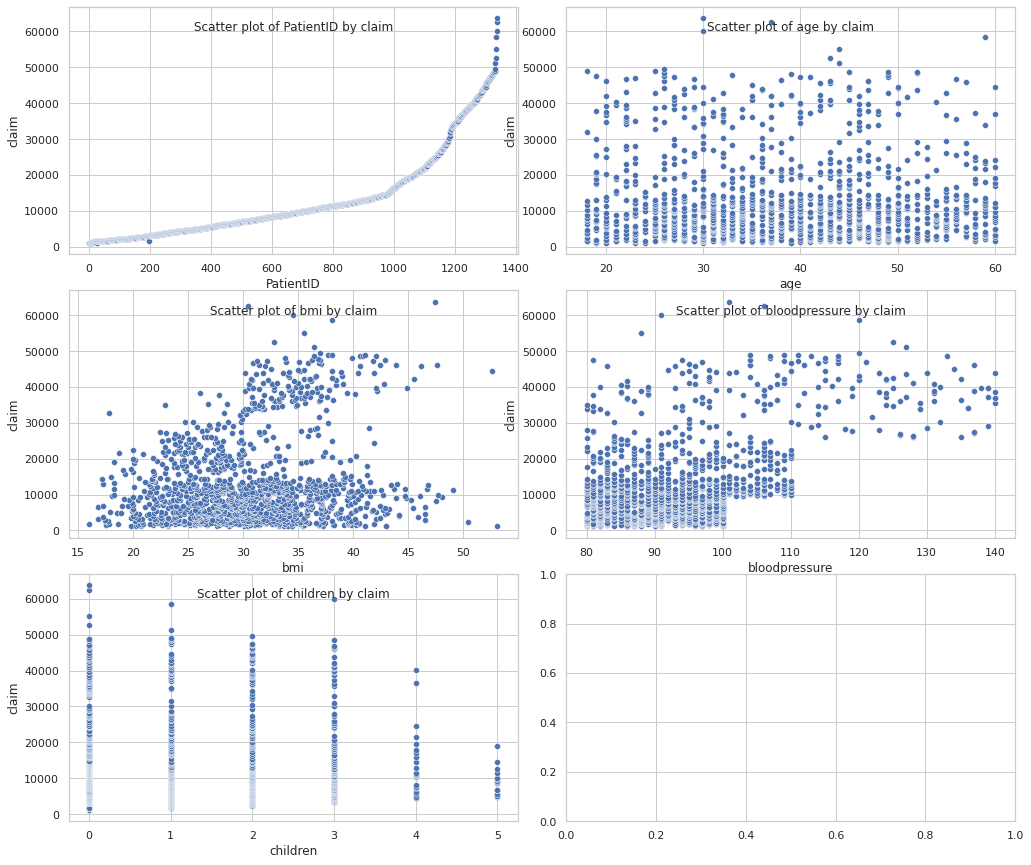

In [ ]:
cols = 2
rows = np.ceil(numeric_df.shape[1] / cols).astype(int)
fig, axes = plt.subplots(rows, 2, figsize=(14, 8 // cols * rows))
plt.tight_layout()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(data=df, x=col, y=TARGET_COL, ax=ax)
    ax.set_title(f"Scatter plot of {col} by {TARGET_COL}", y=0.88)
    
plt.show()

## Categorical features

In [ ]:
for col in categorical_df.columns:
    display(X[col].value_counts(normalize=True).to_frame())

,gender
male,0.50597
female,0.49403


,diabetic
No,0.520896
Yes,0.479104


,smoker
No,0.795522
Yes,0.204478


,region
southeast,0.331339
northwest,0.261032
southwest,0.234854
northeast,0.172775


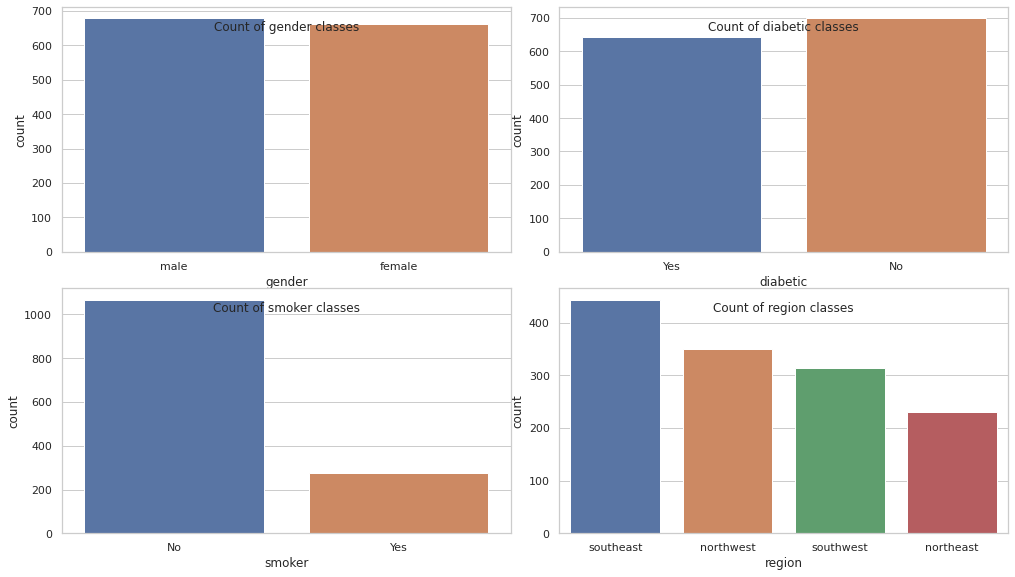

In [ ]:
cols = 2
rows = np.ceil(categorical_df.shape[1] / cols).astype(int)
fig, axes = plt.subplots(rows, 2, figsize=(14, 8 // cols * rows))
plt.tight_layout()

for i, col in enumerate(categorical_df.columns):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=X, x=col, ax=ax)
    ax.set_title(f"Count of {col} classes", y=0.88)

## Categorical features by target

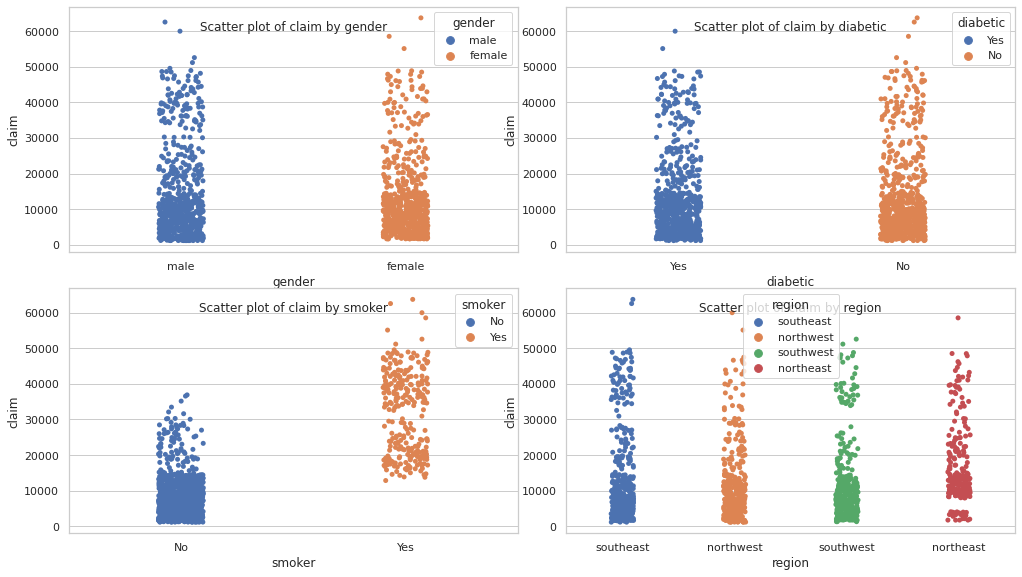

In [ ]:
cols = 2
rows = np.ceil(categorical_df.shape[1] / cols).astype(int)
fig, axes = plt.subplots(rows, 2, figsize=(14, 8 // cols * rows))
plt.tight_layout()

for i, col in enumerate(categorical_df.columns):
    ax = axes[i // 2, i % 2]
    sns.stripplot(data=df, x=col, y=TARGET_COL, hue=col, ax=ax)
    ax.set_title(f"Scatter plot of {TARGET_COL} by {col}", y=0.88)

plt.show()

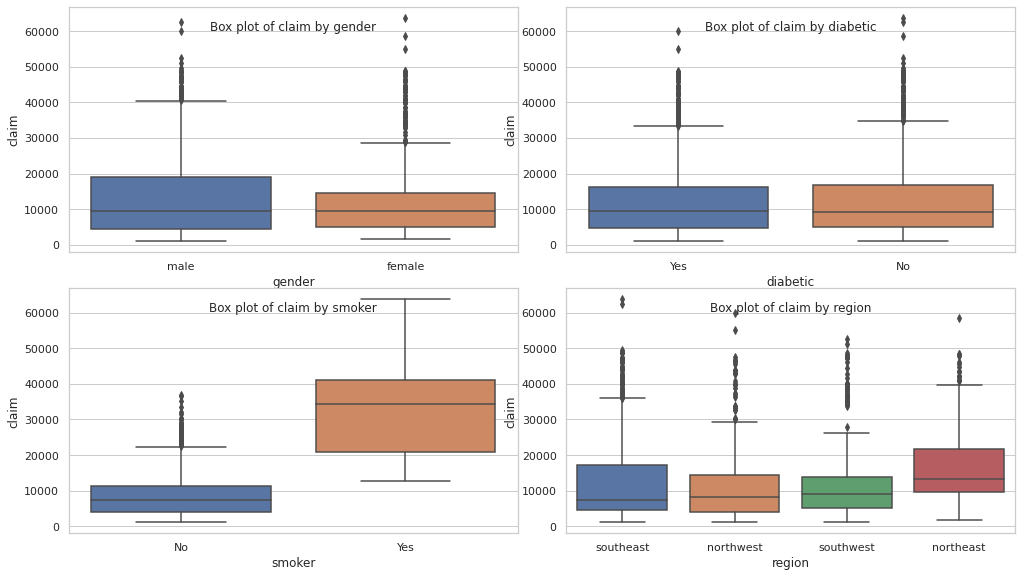

In [ ]:
cols = 2
rows = np.ceil(categorical_df.shape[1] / cols).astype(int)
fig, axes = plt.subplots(rows, 2, figsize=(14, 8 // cols * rows))
plt.tight_layout()

for i, col in enumerate(categorical_df.columns):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=df, x=col, y=TARGET_COL, ax=ax)
    ax.set_title(f"Box plot of {TARGET_COL} by {col}", y=0.88)

plt.show()

## TODO
- Discretize blood pressure. Refer to https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
- Discretize BMI. Reference: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults